# Library

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append(f'E:\gitlab\custom-script\script')
from ursar import scoring, model, fe
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load data

In [5]:
df = pd.read_csv(f'E:\gitlab\machine-learning\dataset\heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [6]:
X = df.drop(["DEATH_EVENT"], axis=1)
y = df["DEATH_EVENT"]
X_s, y_s = fe.imba(X, y,'smote')
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_s, y_s,
                                                    test_size = 0.3, random_state=None)

Original ratio
DEATH_EVENT
0              203
1               96
dtype: int64

SMOTE ratio
DEATH_EVENT
0              203
1              203
dtype: int64


# Training with CV

In [8]:
list_model = ['random_forest',"adaboost","gb","xgb","naive_bayes",'lr']
list_model = ['all']

In [16]:
result,proba = model.cv_model_train(X_train_s.to_numpy(), y_train_s.to_numpy(),
                                      list_model,5)

Finished training for model:
Decision Tree
Random Forest
Ada Boosting
Gradient Boosting
Extra Gradient Boosting
Extra Tree
LGBM
KNN
SVM_linear
SVM_RBF
SVM_sigmoid
Logistic Regression
ANN
Naive Bayes
Linear Discriminant Analysis
SGD


In [17]:
result

,Method,accuracy,accuracy_std,balanced_acc,balanced_acc_std,F1,F1_std,F2,F2_std,AUC,AUC_std,Recall,Recall_std,Precision,Precision_std,Fit Time,Pred Time
0,Random Forest,0.8663,0.0526,0.8621,0.0535,0.8660,0.0523,0.8588,0.0777,0.9369,0.0339,0.8611,0.0840,0.8531,0.0731,0.2210,0.0202
1,Extra Gradient Boosting,0.8697,0.0345,0.8713,0.0336,0.8694,0.0345,0.8739,0.0470,0.9346,0.0386,0.8790,0.0638,0.8650,0.0672,0.0618,0.0050
2,LGBM,0.8416,0.0245,0.8473,0.0296,0.8416,0.0247,0.8277,0.0605,0.9321,0.0458,0.8257,0.0844,0.8538,0.0738,0.0342,0.0042
3,Gradient Boosting,0.8556,0.0301,0.8567,0.0309,0.8557,0.0302,0.8599,0.0335,0.9157,0.0523,0.8642,0.0393,0.8459,0.0461,0.1208,0.0040
4,Extra Tree,0.8697,0.0284,0.8647,0.0342,0.8687,0.0293,0.8620,0.0466,0.9088,0.0491,0.8605,0.0641,0.8764,0.0384,0.1732,0.0200
5,Linear Discriminant Analysis,0.8276,0.0352,0.8274,0.0370,0.8277,0.0357,0.8358,0.0223,0.8873,0.0642,0.8427,0.0224,0.8128,0.0586,0.0070,0.0060
6,Ada Boosting,0.8555,0.0443,0.8579,0.0437,0.8559,0.0438,0.8562,0.0498,0.8832,0.0656,0.8621,0.0521,0.8419,0.0912,0.0992,0.0162
7,Logistic Regression,0.7922,0.0563,0.7915,0.0569,0.7915,0.0567,0.7851,0.0636,0.8743,0.0659,0.7847,0.0739,0.7938,0.0584,0.0292,0.0038
8,Decision Tree,0.7959,0.0298,0.7981,0.0307,0.7961,0.0287,0.7839,0.0509,0.8370,0.0463,0.7846,0.0625,0.7990,0.1012,0.0012,0.0034
9,Naive Bayes,0.7888,0.0379,0.7889,0.0385,0.7891,0.0381,0.7817,0.0259,0.8147,0.0619,0.7806,0.0334,0.7894,0.0378,0.0044,0.0054


# Training model with default setting

In [9]:
models,names_model,probs_model,probs_bool_model,pred_model,time_1,time_2 = model.modeling(
    X_train_s, X_test_s, y_train_s, y_test_s,list_model=list_model)

we have done with these models:
Decision Tree
Random Forest
Adaboost_Classifier
Gradient_boosting_Classifier
Xgboost
extra_tree
lightgbm
K-Nearest Neighbors
SVM_Linear
SVM_RBF
SVM_sigmoid
Logistic_Regression
ANN
Naive Bayes
LDA
SGD


In [28]:
models

[DecisionTreeClassifier(),
 RandomForestClassifier(),
 AdaBoostClassifier(),
 GradientBoostingClassifier(),
 XGBClassifier(),
 XGBClassifier(),
 LGBMClassifier(),
 KNeighborsClassifier(n_jobs=-1),
 SVC(class_weight='balanced', probability=True),
 SVC(probability=True),
 SVC(kernel='sigmoid', probability=True),
 LogisticRegression(),
 MLPClassifier(),
 GaussianNB(),
 LinearDiscriminantAnalysis(),
 SGDClassifier(loss='log')]

comfusion matrix = 
[[49  7]
 [12 54]]


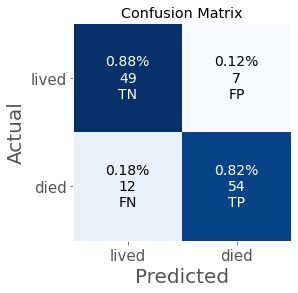


accuracy_score =  0.8443
balanced_accuracy_score =  0.8466

precision score =  0.8852
average precision score =  0.8227
recall score =  0.8182
Brier score loss (the smaller the better) =  0.1047

F1 score =  0.8504
F2 score =  0.8308
F3 score =  0.8244
F_beta score (0.5) =  0.871
Matthews Correlation Coefficient score =  0.6908

AUC of Precision-Recall Curve on Testing =  0.944
Best Threshold for Precision-Recall Curve = 0.410000
F-Score = 0.894
AUC of ROC =  0.9348

Best Threshold for ROC = 0.410000
G-Mean = 0.866
Best Threshold with Youden’s J statistic = 0.410000

Cohens kappa =  0.6885
Gini =  0.888

Expected Approval Rate =  0.5
Expected Default Rate =  0.1148

classification_report
              precision    recall  f1-score   support

           0       0.80      0.88      0.84        56
           1       0.89      0.82      0.85        66

    accuracy                           0.84       122
   macro avg       0.84      0.85      0.84       122
weighted avg       0.85      0

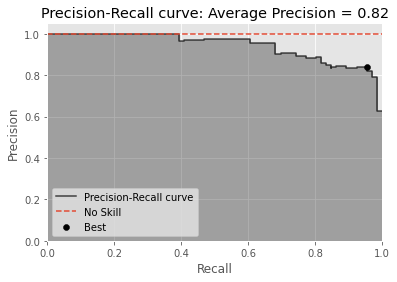

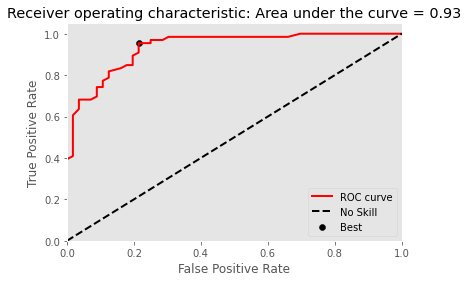


time span=  0:00:00.156998


In [10]:
scoring.print_score(y_test_s,pred_model[1],y_probs=probs_model[1],
                    types='classification',labels=['lived','died'],
                    time1=time_1[1],time2=time_2[1],
                    X_train=None, y_train=None,X_test=None)

# Cross validation at training data with single selected scoring

In [77]:
model.cv_train_simple(models,names_model,X_train_s, y_train_s,'accuracy',5)

,0,1,2,3,4,mean_cv,std_cv
decision_tree,0.824561,0.807018,0.842105,0.789474,0.732143,0.799060,0.037779
RandomForestClassifier,0.877193,0.859649,0.894737,0.929825,0.839286,0.880138,0.030917
Adaboost_Classifier,0.807018,0.842105,0.912281,0.894737,0.785714,0.848371,0.048805
Gradient_boosting_Classifier,0.877193,0.877193,0.912281,0.894737,0.839286,0.880138,0.024218
Xgboost,0.824561,0.912281,0.929825,0.894737,0.821429,0.876566,0.045137
extra_tree,0.824561,0.912281,0.929825,0.894737,0.821429,0.876566,0.045137
lightgbm,0.824561,0.912281,0.877193,0.912281,0.803571,0.865977,0.044774
K_Nearest_Neighbors,0.543860,0.596491,0.684211,0.578947,0.535714,0.587845,0.053090
SVM_Linear,0.508772,0.473684,0.526316,0.543860,0.553571,0.521241,0.028283
SVM_RBF,0.526316,0.508772,0.526316,0.543860,0.553571,0.531767,0.015556


# Dynamic Ensemble Selection (DES)

evaluate knorau predictions at accuracy
> k at 2 | mean = 0.824 | std = 0.069
> k at 3 | mean = 0.824 | std = 0.074
> k at 4 | mean = 0.818 | std = 0.071
> k at 5 | mean = 0.829 | std = 0.063
> k at 6 | mean = 0.834 | std = 0.073
> k at 7 | mean = 0.827 | std = 0.082
> k at 8 | mean = 0.835 | std = 0.067
> k at 9 | mean = 0.842 | std = 0.073
> k at 10 | mean = 0.838 | std = 0.073
> k at 11 | mean = 0.839 | std = 0.066
> k at 12 | mean = 0.822 | std = 0.058
> k at 13 | mean = 0.822 | std = 0.066
> k at 14 | mean = 0.811 | std = 0.059
> k at 15 | mean = 0.827 | std = 0.077
> k at 16 | mean = 0.826 | std = 0.070
> k at 17 | mean = 0.835 | std = 0.060
> k at 18 | mean = 0.833 | std = 0.061
> k at 19 | mean = 0.841 | std = 0.060
> k at 20 | mean = 0.829 | std = 0.077
> k at 21 | mean = 0.844 | std = 0.089


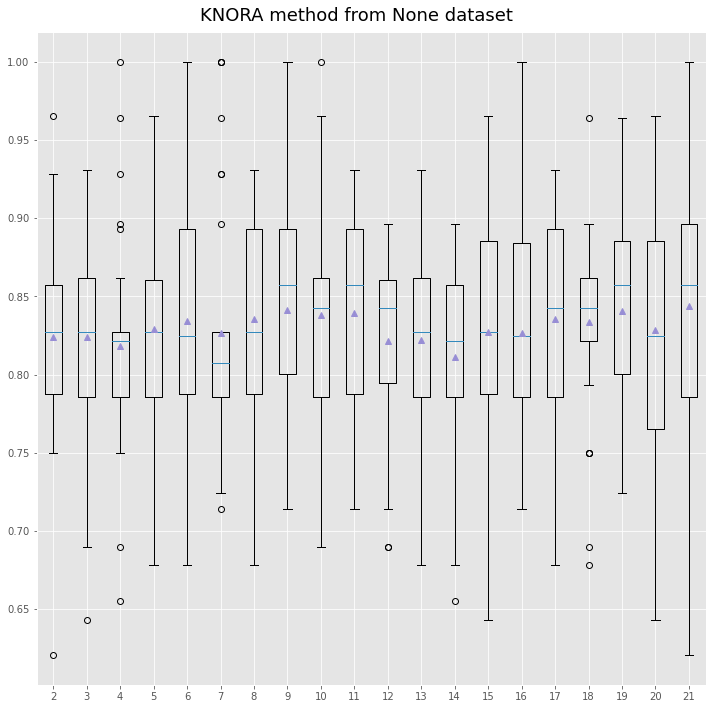

In [7]:
model.dse(X_train_s,y_train_s,X_test=None,y_test=None,action='k',types='knorau',k_value=22,scoring='accuracy',title=None,footnote=None)

In [14]:
y_pred,y_proba = model.dse(X_train_s, y_train_s, X_test_s, y_test_s,
                           action='final',types='knorau',k_value=9,
                           scoring='accuracy',title=None,footnote=None)

evaluate knorau predictions
> Accuracy model knorau: 0.803
evaluate contributing models
> Accuracy model LogisticRegression: 0.828
> Accuracy model DecisionTreeClassifier: 0.803


# Ensemble method (hard and soft voting)

>knn1 | mean = 0.563 | std = 0.076
>knn3 | mean = 0.549 | std = 0.074
>knn5 | mean = 0.539 | std = 0.076
>knn7 | mean = 0.535 | std = 0.074
>knn9 | mean = 0.526 | std = 0.071
>hard_voting | mean = 0.549 | std = 0.077


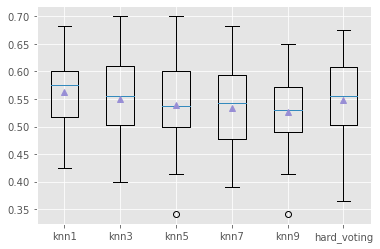

In [31]:
model_hard = model.voting_ensembles(X_s, y_s,'check_voting','hard')

In [56]:
model_soft = model.voting_ensembles(X_train_s,y_train_s,'predict','soft')

In [57]:
y_pred = model_soft.predict(X_test_s)
y_prob = model_soft.predict_proba(X_test_s)[:, 1]

comfusion matrix = 
[[ 0 67]
 [ 0 55]]


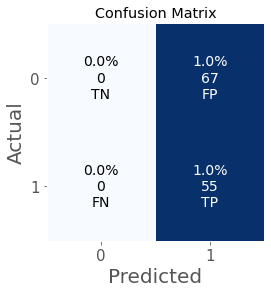


accuracy_score =  0.4508
balanced_accuracy_score =  0.5

precision score =  0.4508
average precision score =  0.4508
recall score =  1.0
Brier score loss (the smaller the better) =  0.2505

F1 score =  0.6215
F2 score =  0.8041
F3 score =  0.8914
F_beta score (0.5) =  0.5064
Matthews Correlation Coefficient score =  0.0

AUC of Precision-Recall Curve on Testing =  0.374
Best Threshold for Precision-Recall Curve = 0.504800
F-Score = nan
AUC of ROC =  0.4195

Best Threshold for ROC = 0.504800
G-Mean = 0.477
Best Threshold with Youden’s J statistic = 0.504800

Cohens kappa =  0.0
Gini =  -0.252

Expected Approval Rate =  1.0
Expected Default Rate =  0.5492

classification_report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        67
           1       0.45      1.00      0.62        55

    accuracy                           0.45       122
   macro avg       0.23      0.50      0.31       122
weighted avg       0.20      0.45      0.2

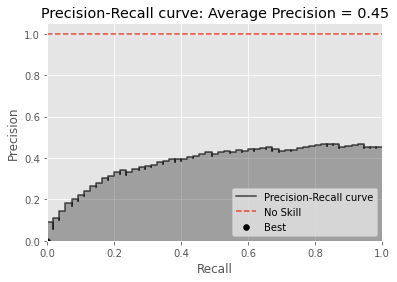

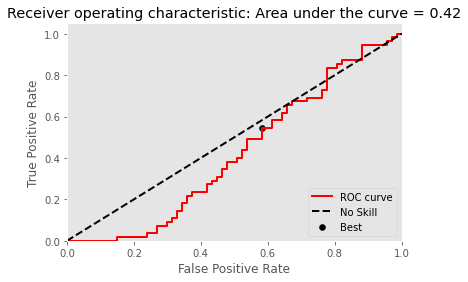


time span=  1


In [58]:
scoring.print_score(y_test_s,y_pred,y_probs=y_prob,types='classification',labels=[0,1],time1=1,time2=2)

# Voting ensembles weighted

## model classification

In [15]:
model_ensemble, model_weighted_ensemble, model_ranking_ensemble = \
model.voting_ensembles_weighted(X_train_s, y_train_s, X_test_s, y_test_s,
                                "soft",'classification')

fit and evaluate each model
>rank 2 -> LR: 82.787
>rank 1 -> DT: 77.049
>rank 3 -> Bayes: 82.787
Weighted Avg Accuracy: 86.885
Voting Accuracy: 86.885
Ranking Weighted Accuracy: 84.426


In [17]:
# make predictions
y_pred = model_weighted_ensemble.predict(X_test_s)
y_prob = model_weighted_ensemble.predict_proba(X_test_s)[:,1]

comfusion matrix = 
[[61  6]
 [10 45]]


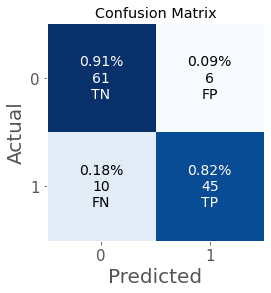


accuracy_score =  0.8689
balanced_accuracy_score =  0.8643

precision score =  0.8824
average precision score =  0.8039
recall score =  0.8182
Brier score loss (the smaller the better) =  0.1243

F1 score =  0.8491
F2 score =  0.8303
F3 score =  0.8242
F_beta score (0.5) =  0.8687
Matthews Correlation Coefficient score =  0.735

AUC of Precision-Recall Curve on Testing =  0.8786
Best Threshold for Precision-Recall Curve = 0.443000
F-Score = 0.862
AUC of ROC =  0.8963

Best Threshold for ROC = 0.443000
G-Mean = 0.875
Best Threshold with Youden’s J statistic = 0.443000

Cohens kappa =  0.7334
Gini =  0.7572

Expected Approval Rate =  0.418
Expected Default Rate =  0.1176

classification_report
              precision    recall  f1-score   support

           0       0.86      0.91      0.88        67
           1       0.88      0.82      0.85        55

    accuracy                           0.87       122
   macro avg       0.87      0.86      0.87       122
weighted avg       0.87   

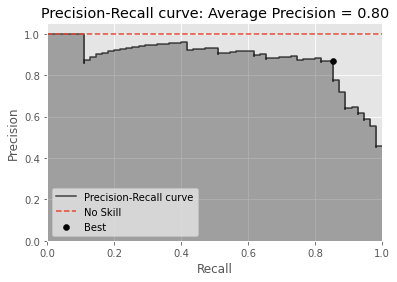

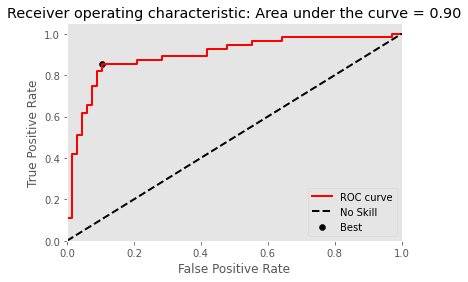


time span=  1


In [19]:
scoring.print_score(y_test_s,y_pred,y_prob,
                    types='classification',labels=[0,1],time1=1,time2=2)

## model regression

In [26]:
# define dataset
X, y = make_regression(n_samples=10000, n_features=20, n_informative=10, noise=0.3, random_state=7)
# split dataset into train and test sets
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.50, random_state=1)
# split the full train set into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.33, random_state=1)

In [27]:
model_ensemble, model_weighted_ensemble, model_ranking_ensemble = \
model.voting_ensembles_weighted(X_train_full, y_train_full, X_test, y_test,
                                "soft",'regression')

fit and evaluate each model
>rank 3 -> knn: -10016.853
>rank 2 -> cart: -13302.265
>rank 1 -> svm: -13819.499
Weighted Avg MAE: 105.010
Voting MAE: 102.964
Ranking Weighted MAE: 97.150


In [28]:
# make predictions
y_pred = model_weighted_ensemble.predict(X_test)


Mean Absolute Percentage Error (MAPE) = 12.93 %
R2                                    = 66.17 %
Mean Absolute Error (MAE)             = 105.01
Median Absolute Error (MAE)           = 85.61
Mean Square Error (MAE)               = 18074.82
Root Mean Absolute Error (RMAE)       = 10.25
Root Mean Absolute Error (RMSE)       = 134.44
Max Error                             = 532.49
Tracking Signal                        = [-0.17 -1.61 -0.42 ... -0.02  0.31 -0.18]


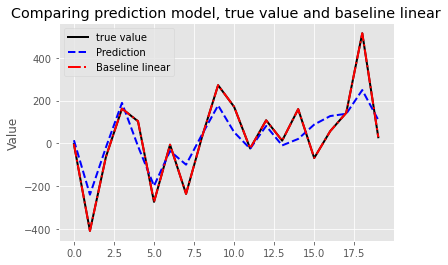


time span=  1


In [30]:
scoring.print_score(y_test,y_pred,y_prob,
                    types='regression',labels=None,time1=1,time2=2,
                    X_train=X_train_full, y_train=y_train_full,X_test=X_test)